In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# import data
df_houses = pd.read_csv('houses.csv')
test = pd.read_csv('houses_test.csv')

In [3]:
df_houses.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_houses.drop(columns =['Unnamed: 0', 'Id'], inplace=True)
test.drop(columns =['Unnamed: 0', 'Id'], inplace=True)

In [5]:
q5, q95 = df_houses.quantile(.005, axis=0), df_houses.quantile(.995, axis=0)
iqr = q95 - q5
lower, upper = q5 - iqr * 1.5, q95 + iqr * 1.5



In [6]:
df_houses = df_houses[~((df_houses > (q95 + iqr * 1.5)).any(axis=1))]

<ipython-input-6-adb05e035b48>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_houses = df_houses[~((df_houses > (q95 + iqr * 1.5)).any(axis=1))]


In [7]:
df_houses

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1455,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,4,NaN,0,2,2010,WD,Normal,210000
1456,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,5,Shed,2500,5,2010,WD,Normal,266500
1457,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [8]:
df_houses.columns.difference(test.columns)

Index(['SalePrice'], dtype='object')

In [9]:
# make dummies for catagorical features
df_train = pd.get_dummies(df_houses)


In [10]:
df_test = pd.get_dummies(test)


In [11]:
dif_test = df_train.columns.difference(df_test.columns).values

In [12]:
df_test[dif_test] = 0

In [13]:
df_test= df_test.drop(columns=['SalePrice'])

In [14]:
# split into train and test
X = df_train.drop("SalePrice", axis = 1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [15]:
#start with a basic regression


model1 = LinearRegression()

model1.fit(X_train, y_train)

print('cv_score', np.mean(cross_val_score(model1, X_train, y_train, cv=5)))

y_pred =model1.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('R2 score:', r2_score(y_test, y_pred))

cv_score 0.8283178467129847
MAE: 17635.395026566468
MSE: 703848207.1457152
RMSE: 26530.13771441293
R2 score: 0.8926378398081307


<AxesSubplot:>

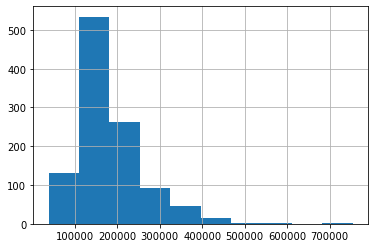

In [16]:
y_train.hist()

In [17]:
y_dif = np.abs(y_test-y_pred )

In [18]:
y_dif.sort_values(ascending=False)[0:20]

898     165049.761439
1046    147935.538050
1169    135292.047209
440     121323.798756
1181     96325.921519
629      90408.507507
375      84532.318370
955      69763.147913
944      69325.641096
970      66953.207468
70       63689.126913
798      61297.737923
1131     57466.165818
1211     54284.944441
199      53835.389464
386      49163.415432
618      46864.445380
107      45278.339905
30       45214.872766
595      43786.221702
Name: SalePrice, dtype: float64

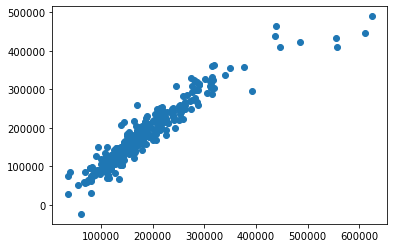

In [19]:
plt.scatter(y_test, y_pred)

In [20]:
#define a function to use random search to find best paramiters

from sklearn.model_selection import RandomizedSearchCV

def find_best_param(model, param_grid):
        model_cv = RandomizedSearchCV(model, param_grid, cv=5)
        model_cv.fit(X_train, y_train)
        return model_cv.best_estimator_



In [21]:
model_scores ={}
y_preds = {}
params_used ={}
def scoring(model_name, model, param_grid):
    
    
    
    new_model = find_best_param(model, param_grid)
    new_model.fit(X_train, y_train)

    y_pred = new_model.predict(X_test)
    
   
    params_used[model_name] = new_model
    y_preds[model_name] = y_pred
    
    model_scores[model_name] = {'model used': model,
                                'cv_score': np.mean(cross_val_score(new_model, X_train, y_train, cv=5)),
                                'MAE': mean_absolute_error(y_test, y_pred),
                                'MSE': mean_squared_error(y_test, y_pred),
                                'RMSE': mean_squared_error(y_test, y_pred, squared=False),
                                'R2 score': r2_score(y_test, y_pred)
                               }
    model_scores, y_preds, params_used

In [22]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [23]:
find_best_param(Ridge(), {'alpha': np.arange(0.001, 300)})

Ridge(alpha=40.00099999999999)

In [24]:
alpha_params = {'alpha': np.arange(0.001, 200)}
scoring('model2', Ridge(), alpha_params)

In [25]:
scoring('model3', Lasso(), alpha_params)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208631655527.58823, tolerance: 544419175.8290086
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150202260532.20755, tolerance: 502555013.4941635
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162549681035.89755, tolerance: 530267286.6076958
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWar

In [26]:
scoring('model4', ElasticNet(), alpha_params)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522996510444.2669, tolerance: 544419175.8290086
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476103763645.2999, tolerance: 502555013.4941635
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423118230445.0246, tolerance: 530267286.6076958
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarnin

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 537668395728.2599, tolerance: 531399998.0714455
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479949248734.9737, tolerance: 467994295.8013258
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 564511680294.2378, tolerance: 544419175.8290086
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarnin

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449439341101.9955, tolerance: 467994295.8013258
  model = cd_fast.enet_coordinate_descent(


In [27]:
RFR_params = {'n_estimators': [300,500, 800, 1000],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth': [10, 20, 30, 40, 50, None],
              'min_samples_split': [2, 5, 10, 15, 20],
              'min_samples_leaf': [1, 2, 5, 10, 15]
             }

scoring('model5', RandomForestRegressor(), RFR_params)

In [28]:
DTR_params = {'max_depth': np.arange(1, 20),
              'min_samples_split': range(10, 60)}


scoring('model6', DecisionTreeRegressor(), DTR_params)

In [29]:
GBR_params = {'learning_rate': [0.01, 0.05, 0.1, 0.5, 1, 5],
              'n_estimators': [ 50, 250, 500, 750, 1000],
              'max_features': ['auto', 'log2'],
              'max_depth': [1, 3, 5, 7, 10, 25, 50, None],
              'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
              'min_samples_leaf': [1, 2, 5, 10, 15, 20, 25]
             }


scoring('model7', GradientBoostingRegressor(), GBR_params)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: ov

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targe

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targe

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targe

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targe

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: RuntimeWarning: overflow encountered in square
  sample_weight * ((y - raw_predictions.ravel()) ** 2)))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb_losses.py:202: Runtim

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 554, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py", line 676, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targe

In [30]:
SVR_params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

scoring('model8', SVR(), SVR_params)

In [31]:
model_scores

{'model2': {'model used': Ridge(),
  'cv_score': 0.8543464346915931,
  'MAE': 16660.427136070997,
  'MSE': 677587722.776437,
  'RMSE': 26030.515223030776,
  'R2 score': 0.896643507935075},
 'model3': {'model used': Lasso(),
  'cv_score': 0.8545856455336928,
  'MAE': 16539.369784817798,
  'MSE': 663995193.5186349,
  'RMSE': 25768.104189455516,
  'R2 score': 0.898716857399879},
 'model4': {'model used': ElasticNet(),
  'cv_score': 0.8014612703553355,
  'MAE': 19578.338441025775,
  'MSE': 995664117.1957272,
  'RMSE': 31554.145800444785,
  'R2 score': 0.848125420563111},
 'model5': {'model used': RandomForestRegressor(),
  'cv_score': 0.8448185094476697,
  'MAE': 16859.55911278829,
  'MSE': 761609865.221765,
  'RMSE': 27597.28003303523,
  'R2 score': 0.8838271099883345},
 'model6': {'model used': DecisionTreeRegressor(),
  'cv_score': 0.7486257519076112,
  'MAE': 23905.152174702336,
  'MSE': 1310079909.5412385,
  'RMSE': 36195.0260331615,
  'R2 score': 0.8001657066333945},
 'model7': {'mod

In [32]:
pd.DataFrame(y_test).describe()

,SalePrice
count,362.000000
mean,177089.930939
std,81080.154593
min,34900.000000
25%,129600.000000
50%,156500.000000
75%,207500.000000
max,625000.000000


In [33]:
pd.DataFrame(y_preds['model3']).describe()

,0
count,362.000000
mean,174310.584279
std,75478.317775
min,14276.681841
25%,122164.983576
50%,159003.589570
75%,212882.155569
max,478702.324866


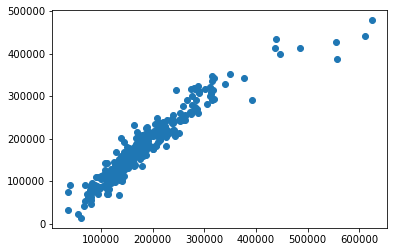

In [34]:
plt.scatter(y_test, y_preds['model3'])

In [35]:
y_dif = np.abs(y_test-y_preds['model3'] )
y_dif.sort_values(ascending=False)[:20]

1046    170016.046217
898     168930.995716
1169    146297.675134
440     126705.776168
1181    102238.343028
70       71699.722933
798      70634.285241
1211     68977.318384
970      66103.612502
944      64180.429591
30       50787.292871
629      48572.204468
527      47728.151941
955      46947.809678
375      46723.318159
738      43788.183802
199      43426.218644
1122     42522.778965
607      42121.088430
1212     41498.073804
Name: SalePrice, dtype: float64